## Programming for Data Analysis - Project 2021
---
Jody Bradley (G00387878@gmit.ie)

![penguins](images/penguins.png)

### Assignment
- Create a data set by simulating a real-world phenomeon, modeled and synthesised using Python. 
- Choose a real world phenomenon that can be measured and for which at least 100 data points can be collected over at least four different variables.
- Investigate the types of variables involved, their likely distributions and their relationships with each other.
- Synthesis / simulate a data set as closely matching their properties as possible. 
- Detail your research and implement the simulation in a Jupyter notebook - the data itself can simply be displated in an output cell within the notebook.

### Introduction
Synthetic data plays an important role in data science, as it allows us to test a new algorithm under controlled conditions. In addition, real data can be hard / costly to acquire - synthesizing data bypasses this cost [https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/].

### Generating synthetic data with NumPy.random
The assignment brief suggested that we use the NumPy Random package for the purpose of this assignment. NumPy is the universal standard for working with numerical data in Python, and it's users include everyone from coding students to experienced computer scientists. The NumPy API is used in Pandas, SciPy, Matplotlib, scikit-learn, scikit-images and many other Python packages. It can be used to perform a wide variety of mathematical operations on arrays [https://numpy.org/doc/stable/user/absolute_beginners.html]. The NumPy Random module is a suite of functions based on pseudo random number generation [https://www.datacamp.com/community/tutorials/numpy-random].


### Dataset
https://archive-beta.ics.uci.edu/ml/datasets/palmer+penguins-3

The Palmer penguins dataset was collected for research that was conducted as part of the Palmer Station, Antarctica, Long-Term Ecological Research program. The purpose of the research was to study Antarctic penguins’ foraging behavior and its relationship with environmental variability.

The dataset comprises data for three species of penguin: Adélie (152 penguins), Gentoo (124 penguins), and Chinstrap (68 penguins) giving a total sample size of 344*. 

NOTE: I cleansed the data by manually removing two samples where numerical data was not measured (captured as "NA"). Therefore, the dataset which I'm working with comprises 342 samples. There are also 9 samples where the gender has not been determined, however, these have remained in the dataset. 

The following variables are measured:

* species: The sample consists of three species - Adélie (152 penguins), Gentoo (124 penguins), and Chinstrap (68 penguins).
* island: Samples were taken from three islands - Biscoe, Dream and Torgersen.
* bill_length: Length of the penguin's bill (in mm).
* bill_depth: Depth of the penguin's bill (in mm).
* flipper_length: (in mm).
* body_mass: (in grams).
* sex: Male / Female / NA (where the sex was not confirmed).

With regards to the above variables, I would imagine that there will be a correlation between flippper length and body mass, as it would make sense that the bigger the penguin the longer the flipper! There may be a correlation between bill length and bill depth, however, this might depend on the species of penguin. Let's take a look at the data set and find out! 

### Load Python Libraries

In [1]:
# import pandas and sklearn neighbors.
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.neighbors as nei

### Load Dataset

The penguins dataset is saved in the repository as a CSV file.

In [2]:
# load the penguins data set.
df = pd.read_csv('penguins.csv')

# View data.
df

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207,4000,male
338,Chinstrap,Dream,43.5,18.1,202,3400,female
339,Chinstrap,Dream,49.6,18.2,193,3775,male
340,Chinstrap,Dream,50.8,19.0,210,4100,male


### Describe the Data

We can use df.describe() to view some basic statistical details of the data set, inlcuding the percentile, mean and standard deviation. We'll be using the mean and std later when it comes to synthesizing our data.

In [3]:
df.describe()

,bill_length,bill_depth,flipper_length,body_mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Visualise the Data

In order to see what the data looks like, I've used seaborn pairplot to plot the pairwise relationships in the dataset. This function creates a grid of axes that shows the relationships between each of the variables. We have seperated the data points by species using the "hue" parameter. 

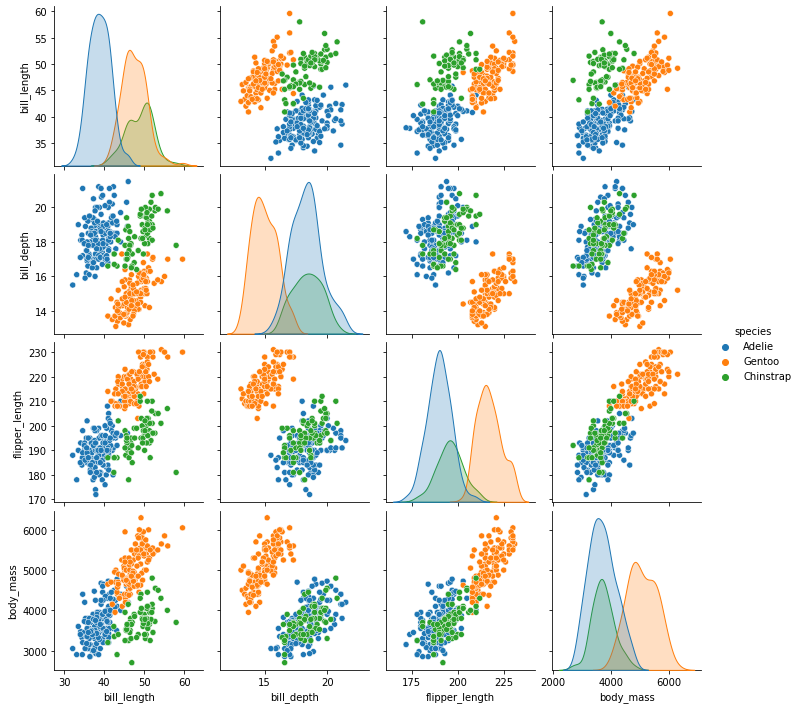

In [4]:
# import seaborn package.
import seaborn as sns

# Plot the penguin data with a pair plot. 
sns.pairplot(df, hue='species')

The distributions are normally distributed for the four numerical variables of each species, however, there is a clear differentiation between each of the species.The Gentoo has the highest body mass out of the three penguin species, and they also have the highest flipper length. Interestingly, the Gentoo has the smallest bill depth but the highest bill lenght. In contrast, the Adelie is the smallest penguin, but has the deepest bill. Let's look at some of these in more detail.

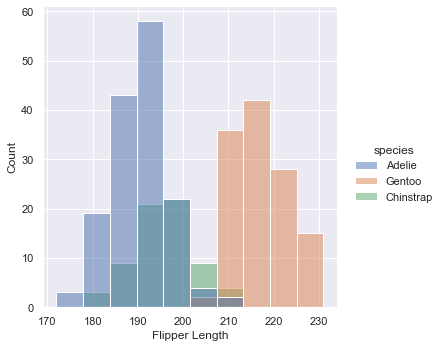

In [5]:
sns.set_theme()

fl = sns.displot(df, x="flipper_length", hue="species")
fl.set(xlabel = "Flipper Length")


We can see from the above plot that the most common flipper length is c. 195 mm, but as the distribution appears bimodal (as ther are two peaks), this number does not represent the data well. [https://seaborn.pydata.org/tutorial/distributions.html

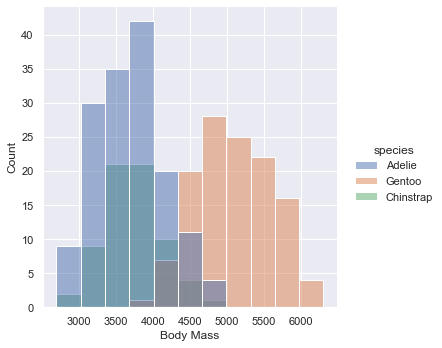

In [6]:
bm = sns.displot(df, x="body_mass", hue="species") 
bm.set(xlabel = "Body Mass")


We can see from the above plot that the most common body mass is c.65 grams. This is a normal distribution with a right skew (i.e. "positively skewed"). 


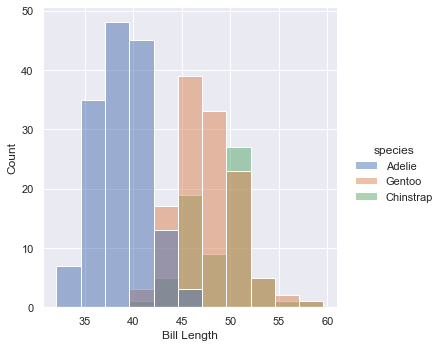

In [7]:
bl = sns.displot(df, x="bill_length", hue="species")
bl.set(xlabel = "Bill Length")


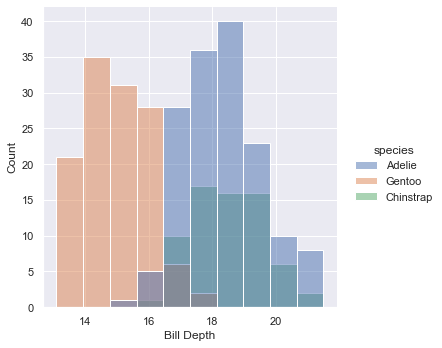

In [8]:
bd = sns.displot(df, x="bill_depth", hue="species")
bd.set(xlabel = "Bill Depth")

Again, the distribution here appears bimodal

### Synthesizing data

Next we're going to take a look at how we might go about synthesizing some data that resembles the Palmer's Penguins dataset.

In [9]:
# describe the dataset so that we can see the mean and std - we'll be using these in our numpy.random formula. 
df.describe()

,bill_length,bill_depth,flipper_length,body_mass
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
# Here we set a dataframe and use numpy.random to randomly generate a data set of 342 samples.
s1 = pd.DataFrame({'species':np.random.choice(a=['Adélie','Gentoo','Chinstrap'], size=342, p=[0.34,0.33,0.33]),
                   'bill_length':np.random.uniform(43.92, 5.45, 342),
                   'bill_depth':np.random.uniform(17.15, 1.97, 342),
                   'flipper_length':np.random.uniform(200.91, 14.06, 342),
                   'body_mass':np.random.uniform(4201.75, 801.95, 342),
                   'gender':np.random.choice(a=['male','female'], size=342, p=[0.5,0.5])})

s1

,species,bill_length,bill_depth,flipper_length,body_mass,gender
0,Gentoo,41.473822,5.542409,73.072332,1170.807175,female
1,Gentoo,39.101871,17.063915,52.815702,2517.283720,female
2,Adélie,30.266052,2.335773,166.950057,2010.249539,female
3,Chinstrap,40.690889,5.329517,142.972769,1532.801616,female
4,Gentoo,19.674133,15.560641,15.612777,3980.707694,male
...,...,...,...,...,...,...
337,Adélie,34.289256,2.065082,87.427795,2980.137886,male
338,Adélie,13.497456,3.295391,27.784037,2463.561305,male
339,Chinstrap,35.607993,6.971002,14.512672,3729.125069,female
340,Adélie,37.487883,16.187647,112.036000,1541.546675,female


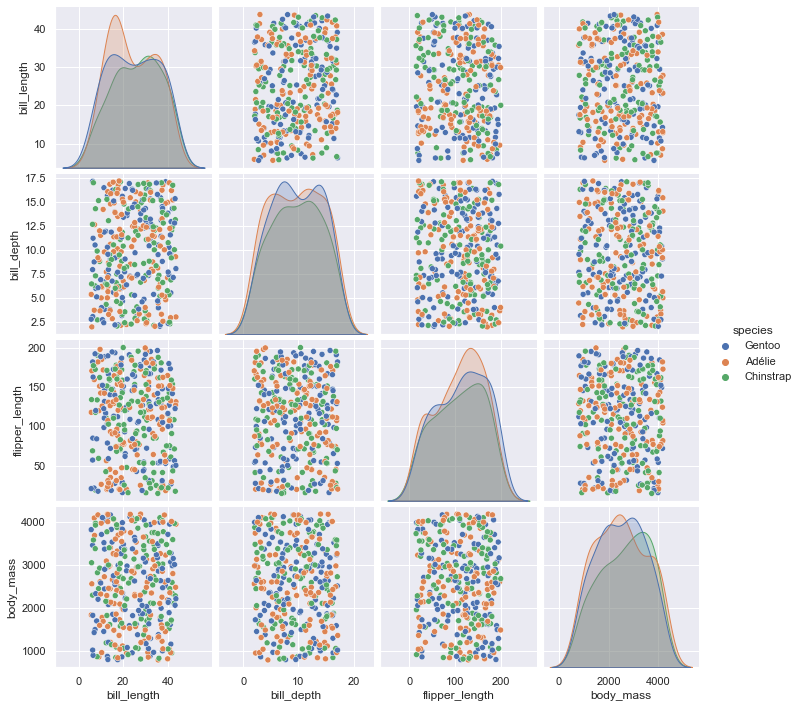

In [11]:
sns.pairplot(s1, hue='species')

As we can see, while the above simulation does provide us with 342 samples of different penguin species with different attributes, it does not accurately match the real life data. One reason for this is that we used the mean and standard deviation for all penguin species accross the entire dataset. Therefore there is no distinction between the penguin species. There also appears to be no correlation between the variables. How can we make this more accurate?

As each of the three species are quite distinct in their other variables, we can generate the species seperately first using their own distinctive mean and std for each variable, and combine them into one dataset. Following this, perhaps we could use "if statements" to determine the other variables based on the species, allowing us to make the data more accurate.


In [12]:
# Testing our random choice method to randomly generate species.
sp1 = np.random.choice(a=['Adélie','Gentoo','Chinstrap'], p=[0.34,0.33,0.33])

if sp1 == "Gentoo":
    print("Gentoo!!!")
    
elif sp1 == 'Adélie':
    print("Adelie!!!")
    
else:
    print("Chinstrap!!!")

Adelie!!!


In the original Palmer's Penguins dataframe, there are 344 penguins giving a percentage breakdown as follows: Adelie 44% (152 penguins), Gentoo 36% (124 penguins), and Chinstrap 20% (68 penguins). We'll use these percentages in the numpy random choice module to generate a random sample. 

In [14]:

for i in range(1):
    x = np.random.choice(a=['Adélie','Gentoo','Chinstrap'], size=342, p=[0.44,0.36,0.20])

sampledf = pd.DataFrame({'species':x})

sampledf

,species
0,Adélie
1,Gentoo
2,Chinstrap
3,Gentoo
4,Adélie
...,...
337,Chinstrap
338,Chinstrap
339,Adélie
340,Adélie


We'll use the count function to see the number of each species that we have generated.

In [15]:
sampledf['species'].value_counts() 

Adélie       153
Gentoo       114
Chinstrap     75
Name: species, dtype: int64

As this may change when the use restarts the kernal, I've capture the output of the count function here, as these are the numbers we will be using further down:

* Adélie       153
* Gentoo       114
* Chinstrap     75

In [ ]:
### New Approach
#Lets look at creating a df for each of the three species and then merging.
# Take the following as previously randomly generated:
#Gentoo       153
#Chinstrap    114
#Adélie       75

In [16]:
# Creating df for Gentoo species
gentoo_df = pd.read_csv('gentoo.csv')
df_Gentoo = pd.DataFrame({'species':"Gentoo",
                          'bill_length':np.random.normal(47.5, 3.08, 153),
                          'bill_depth':np.random.normal(14.98, 0.98, 153),
                          'flipper_length':np.random.normal(217.18, 6.48, 153),
                          'body_mass':np.random.normal(5076.01, 504.11, 153),
                          'gender':np.random.choice(a=['male','female'], size=153, p=[0.5,0.5])})

df_Gentoo

,species,bill_length,bill_depth,flipper_length,body_mass,gender
0,Gentoo,46.098666,13.936313,216.613506,4444.698502,male
1,Gentoo,49.570032,13.372350,219.418257,5200.341448,male
2,Gentoo,48.382781,14.178643,221.607146,4832.977060,male
3,Gentoo,43.955891,16.253718,219.089424,5203.026676,female
4,Gentoo,50.976185,16.130986,218.983487,5100.762606,male
...,...,...,...,...,...,...
148,Gentoo,45.497564,15.150109,220.665487,4557.085176,female
149,Gentoo,48.464446,16.130730,216.370506,4570.592394,female
150,Gentoo,48.242430,14.750564,213.774050,4486.504532,female
151,Gentoo,43.851579,16.273471,217.994373,5203.518077,female


While the individual elements look ok, there is no correlation between them. What can we do fix this?

In [ ]:
adelie_df = pd.read_csv('adelie.csv')
adelie_df.describe()

In [18]:
# Creating df for Adelie species
df_Adelie = pd.DataFrame({'species':"Adelie",
                          'bill_length':np.random.normal(38.79, 2.66, 114),
                          'bill_depth':np.random.normal(18.34, 1.21, 114),
                          'flipper_length':np.random.normal(189.95, 6.53, 114),
                          'body_mass':np.random.normal(3700.66, 458.56, 114),
                          'gender':np.random.choice(a=['male','female'], size=114, p=[0.5,0.5])})

df_Adelie

,species,bill_length,bill_depth,flipper_length,body_mass,gender
0,Adelie,36.076113,18.963978,180.534082,4249.657122,male
1,Adelie,37.897633,18.097935,192.287147,3825.272657,female
2,Adelie,38.660151,17.189540,193.074773,4130.893083,male
3,Adelie,40.416293,18.039283,194.220069,3682.554053,male
4,Adelie,38.177658,17.014737,177.604741,4274.433414,male
...,...,...,...,...,...,...
109,Adelie,39.721391,19.242590,187.532635,3344.717933,male
110,Adelie,37.516202,18.338453,194.527427,3534.377262,female
111,Adelie,39.146738,18.696402,194.509455,4343.578712,female
112,Adelie,40.201212,18.801232,192.237777,3785.723181,female


In [19]:
# Creating df for Chinstrap species. 
Chinstrap_df = pd.read_csv('chinstrap.csv')
df_Chinstrap = pd.DataFrame({'species':"Chinstrap",
                          'bill_length':np.random.normal(43.33, 5.85, 75),
                          'bill_depth':np.random.normal(18.28, 1.15, 75),
                          'flipper_length':np.random.normal(193.7, 6.85, 75),
                          'body_mass':np.random.normal(3729.63, 426.37, 75),
                          'gender':np.random.choice(a=['male','female'], size=75, p=[0.5,0.5])})

df_Chinstrap

,species,bill_length,bill_depth,flipper_length,body_mass,gender
0,Chinstrap,39.413664,20.660725,191.168479,3261.861313,male
1,Chinstrap,46.881049,16.948697,195.080058,3616.929794,female
2,Chinstrap,49.553166,17.535719,182.708485,3583.350911,male
3,Chinstrap,47.655353,18.864509,194.240375,3059.092054,male
4,Chinstrap,53.798312,19.869070,204.086404,3552.703450,female
...,...,...,...,...,...,...
70,Chinstrap,32.998602,19.702949,195.896110,3843.253694,male
71,Chinstrap,34.137326,17.277902,194.810113,4225.408571,male
72,Chinstrap,30.944786,18.203189,187.246036,3725.729257,male
73,Chinstrap,45.854550,18.634742,192.289324,2426.342946,female


In [20]:
# Append dataframes

result = pd.concat([df_Adelie, df_Gentoo, df_Chinstrap], ignore_index=True, sort=False)
result

,species,bill_length,bill_depth,flipper_length,body_mass,gender
0,Adelie,36.076113,18.963978,180.534082,4249.657122,male
1,Adelie,37.897633,18.097935,192.287147,3825.272657,female
2,Adelie,38.660151,17.189540,193.074773,4130.893083,male
3,Adelie,40.416293,18.039283,194.220069,3682.554053,male
4,Adelie,38.177658,17.014737,177.604741,4274.433414,male
...,...,...,...,...,...,...
337,Chinstrap,32.998602,19.702949,195.896110,3843.253694,male
338,Chinstrap,34.137326,17.277902,194.810113,4225.408571,male
339,Chinstrap,30.944786,18.203189,187.246036,3725.729257,male
340,Chinstrap,45.854550,18.634742,192.289324,2426.342946,female


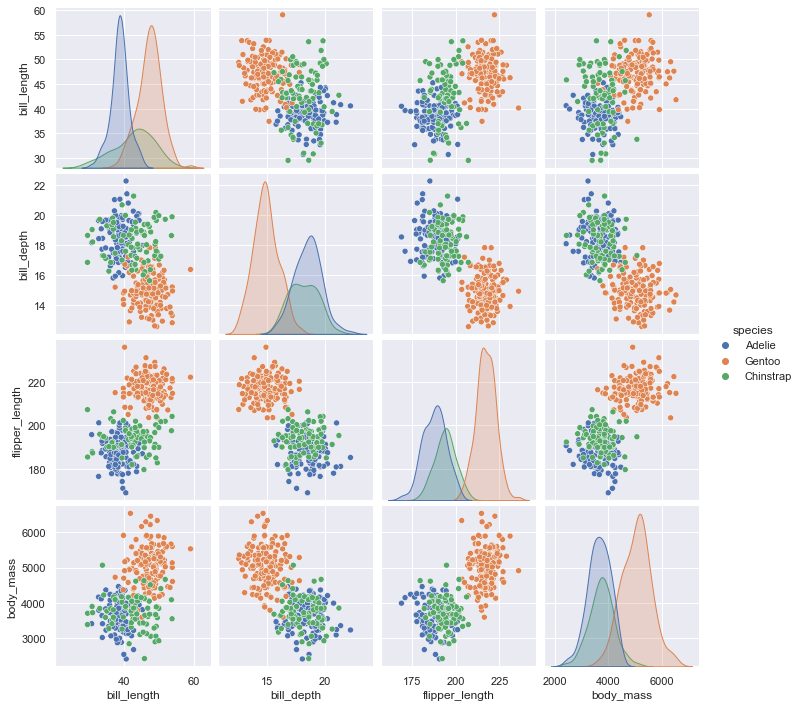

In [21]:

sns.pairplot(result, hue='species')

Let's compare this to the real world data:


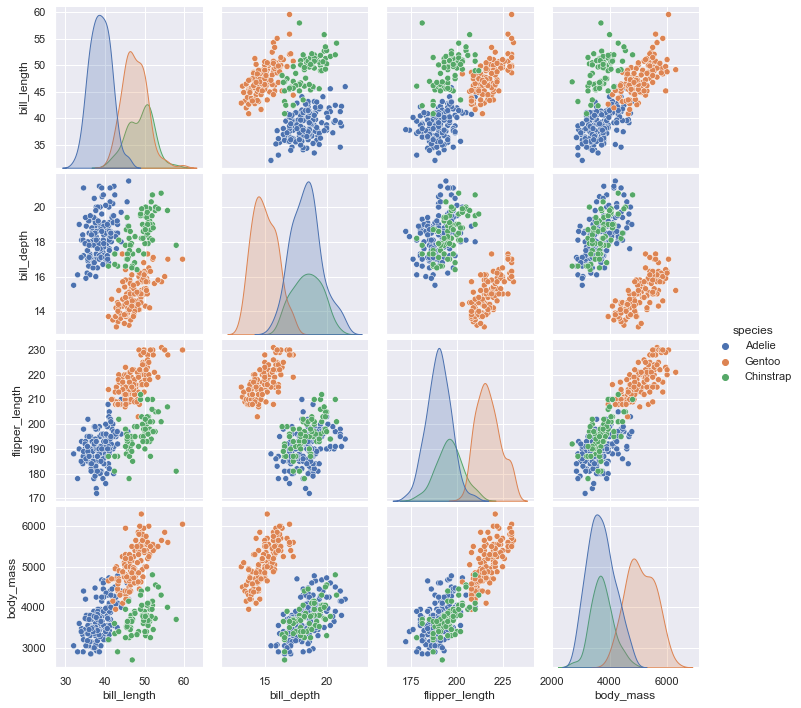

In [22]:
sns.pairplot(df, hue='species')

### Results

As we can see from the above, the synthesise data is good on a stand-alone basis, however, there is no real correltation between the different variables. This is a problem that I experienced through out this project and unfortunately, I was unable to overcome it using the numpy random module. 